In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Why High Recall?

🔹 HR wants to identify as many at-risk employees as possible.
🔹 False Negatives (FN) are employees who leave unexpectedly without intervention.
🔹 Since replacing an employee costs 50-60% of their salary, missing even a few cases of attrition can be expensive.
🔹 A high recall model ensures that most leaving employees are correctly flagged, allowing HR to take proactive retention measures (better salaries, flexible work, growth opportunities).

✅ Optimizing for recall means fewer at-risk employees slip through unnoticed.



In this scenario, **high recall is more important** than high precision because **false negatives (employees predicted to stay but actually leave) are more costly** for the organization.  

---

### **Why High Recall?**  
🔹 **HR wants to identify as many at-risk employees as possible.**  
🔹 **False Negatives (FN)** are employees who **leave unexpectedly** without intervention.  
🔹 Since replacing an employee costs **50-60% of their salary**, missing even a few cases of attrition can be expensive.  
🔹 A **high recall model ensures that most leaving employees are correctly flagged**, allowing HR to take proactive retention measures (better salaries, flexible work, growth opportunities).  

✅ **Optimizing for recall means fewer at-risk employees slip through unnoticed.**  

---

### **When is Precision Important?**  
- If the company has **limited retention resources**, it might prefer high precision to **only focus on the most likely leavers** and avoid wasting retention efforts on stable employees.  
- However, in this case, **false positives (predicting someone will leave when they won’t)** are **less harmful** than false negatives.  

📌 **Best Approach:**  
1️⃣ **Prioritize recall** to catch most at-risk employees.  
2️⃣ **Ensure explainability** → Feature importance analysis to uncover key attrition factors.  
3️⃣ **Optimize F1-score** for a balance between precision and recall.  

---

### **Beyond Prediction: Actionable Insights**  
Your model should **not only predict attrition** but also help HR **understand**:  
- **Key drivers of attrition** (salary, job role, work-life balance, career growth).  
- **Who is most at risk?** (departments, demographics, tenure groups).  
- **Targeted retention strategies** to prevent top talent from leaving.  

Would you like help in **feature selection or interpretability methods** like **SHAP or feature importance plots**? 🚀

In [2]:
# Importing Dataset using pandas library.
DataSet = pd.read_csv("./WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
analysis_df = DataSet
analysis_df.shape

(1470, 35)

In [5]:
analysis_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


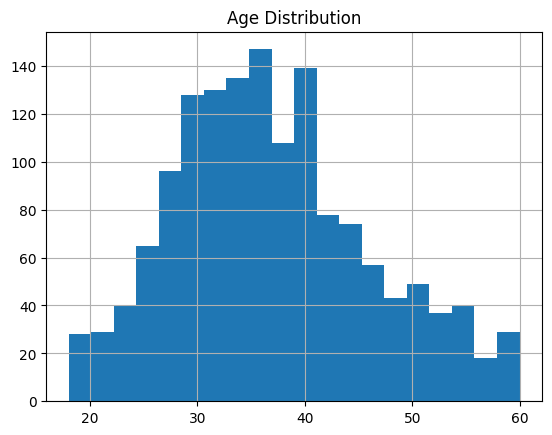

In [8]:
import matplotlib.pyplot as plt

analysis_df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()


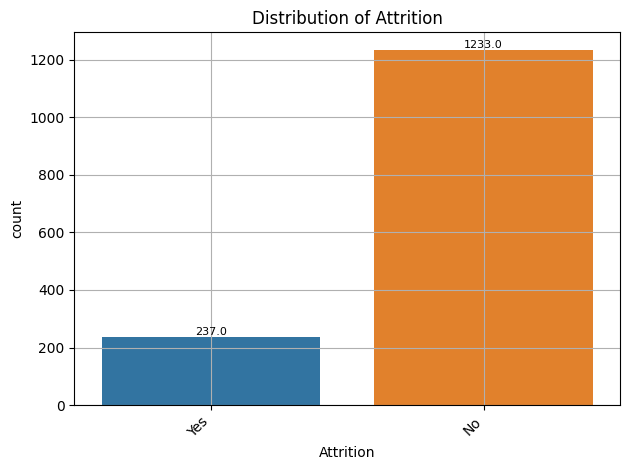

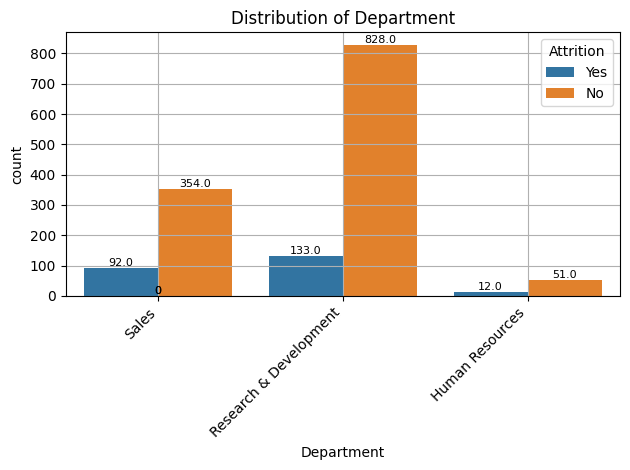

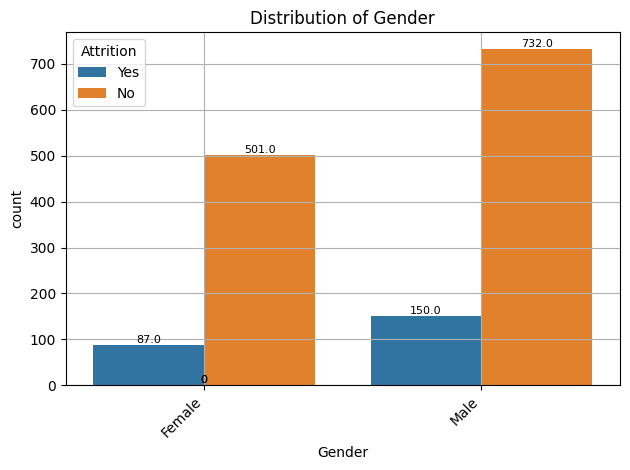

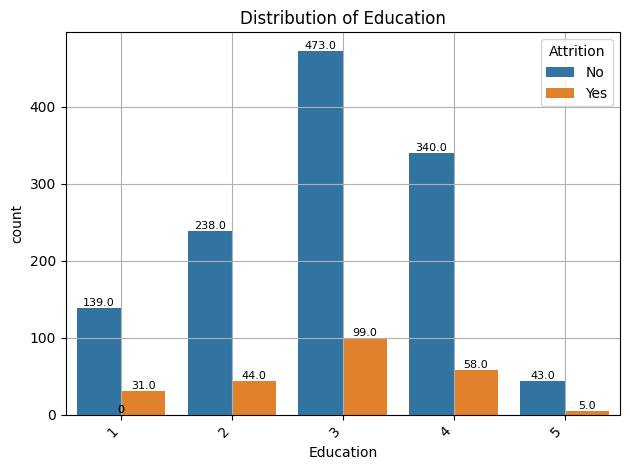

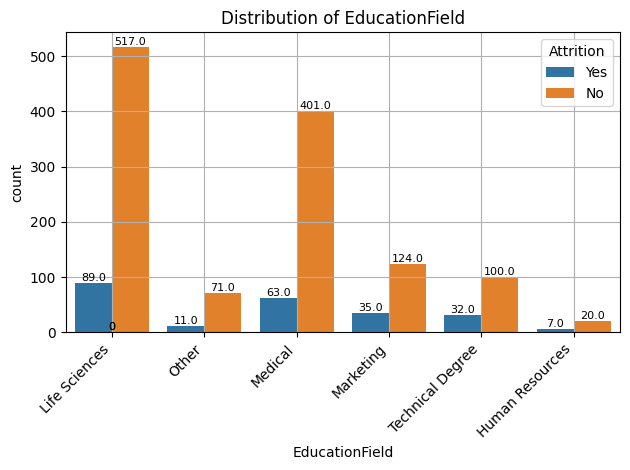

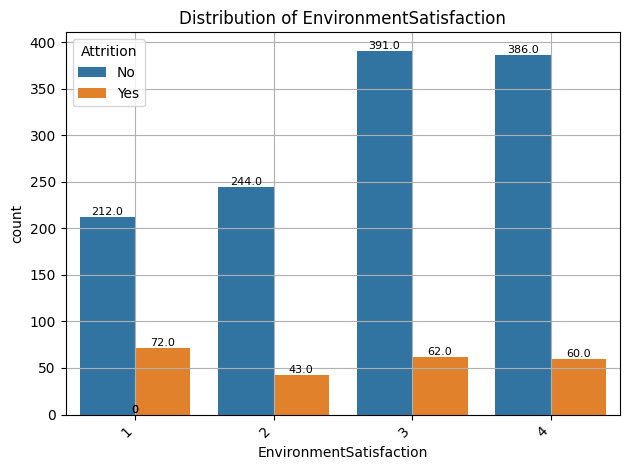

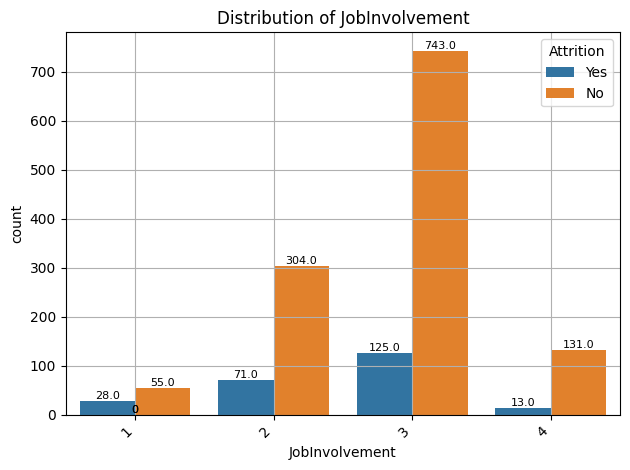

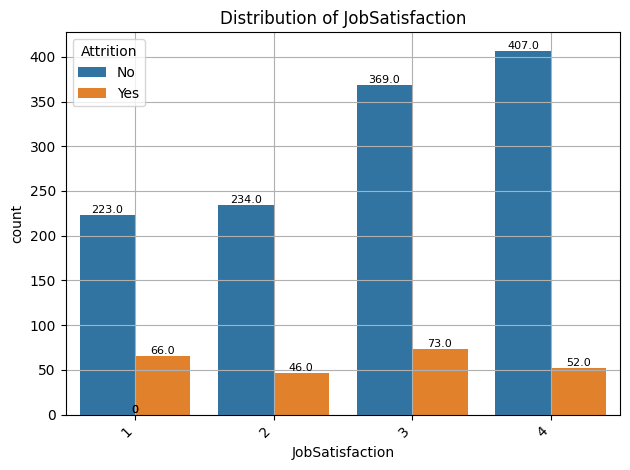

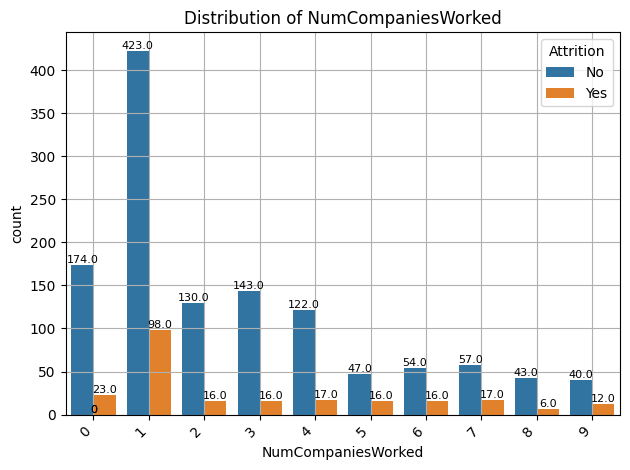

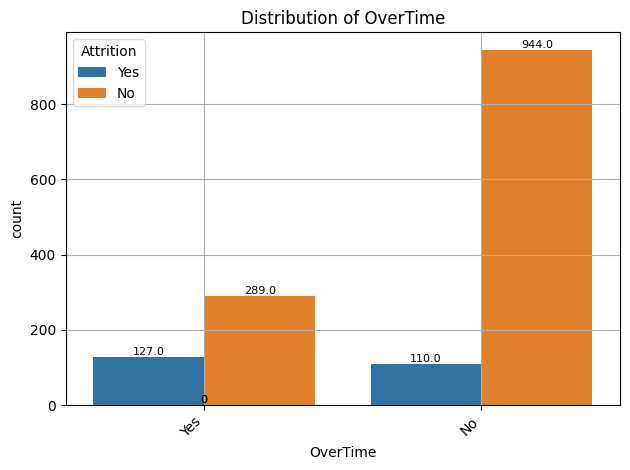

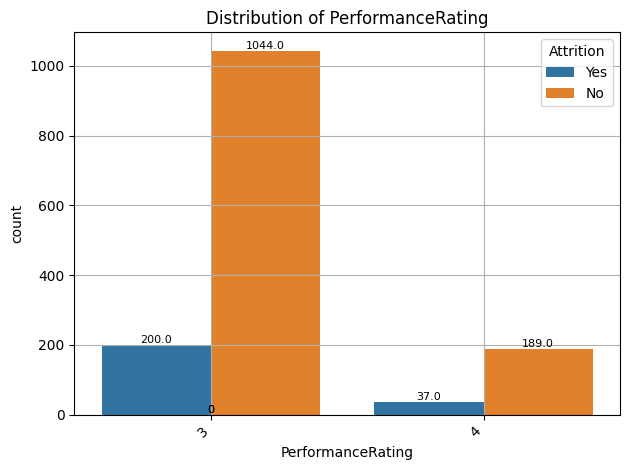

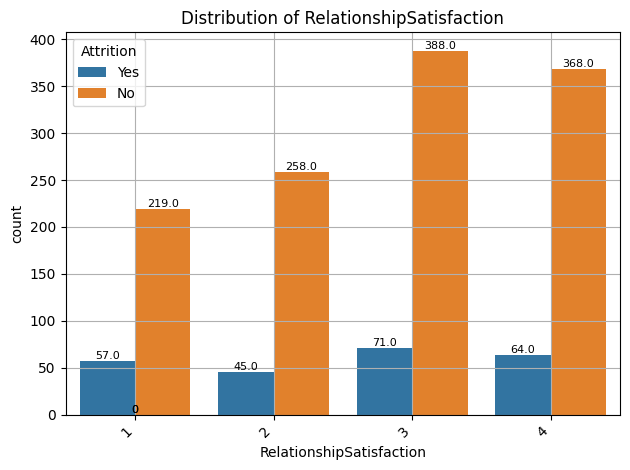

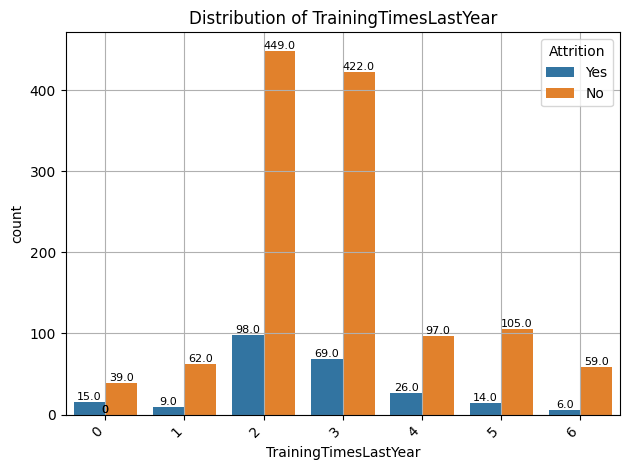

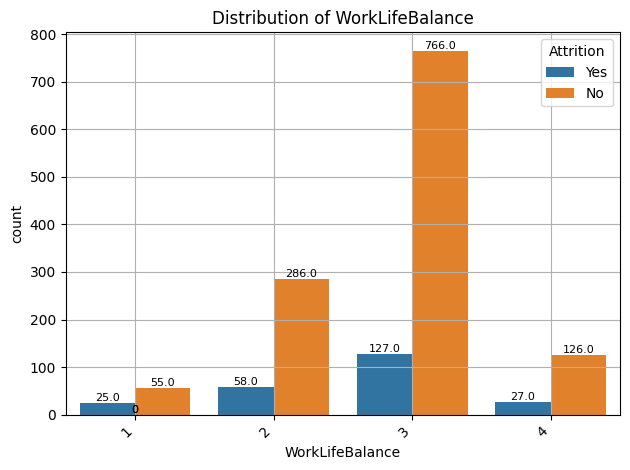

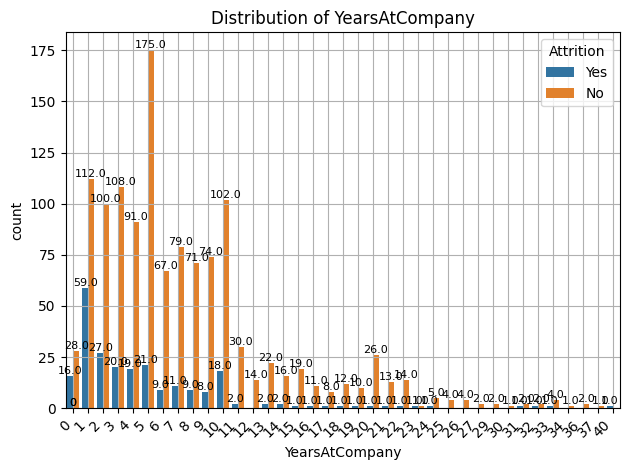

In [9]:
def plot_countplot_with_hue(features,df,hue):
    for feature in features:    
        ax = sns.countplot(x=feature, data=df,hue=hue)
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),ha='center', va='bottom', fontsize=8, color='black')
        plt.grid(True)
        plt.title(f'Distribution of {feature}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()  
        plt.show()

features_to_plot_with_hue = ['Attrition', 'Department', 'Gender', 'Education', 'EducationField','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance', "YearsAtCompany"]

plot_countplot_with_hue(features_to_plot_with_hue,analysis_df,'Attrition')

The above graph displays count plots for several organizational features, color‐coded by attrition status (“Yes” or “No”). It highlights notable trends in job satisfaction, overtime, relationship satisfaction, and tenure, offering insights into potential drivers of employee turnover.

1. Out of 1470 employees, **237** (approximately **16%**) have left the organization.
2. **Environment Satisfaction** levels of **1** and **2** are notably high, with 284 and 287 employees respectively.
3. Similarly, **Job Satisfaction** levels of **1** and **2** are notably high, with 289 and 280 employees respectively, and the majority of those who have resigned fall into these lower satisfaction brackets. A portion of employees with a moderate satisfaction level (**3**) have also exited the company.  
4. Approximately **400** employees report working **overtime**; however, many of these individuals still choose to leave, suggesting that overtime compensation or other retention factors may be insufficient.  
5. **Relationship Satisfaction** levels of **1** and **2** are found in 276 and 303 employees, respectively, raising potential concerns about the workplace culture and environment.  
6. Finally, the data indicates that most employees who do leave the organization tend to do so within **two to three years** of service.

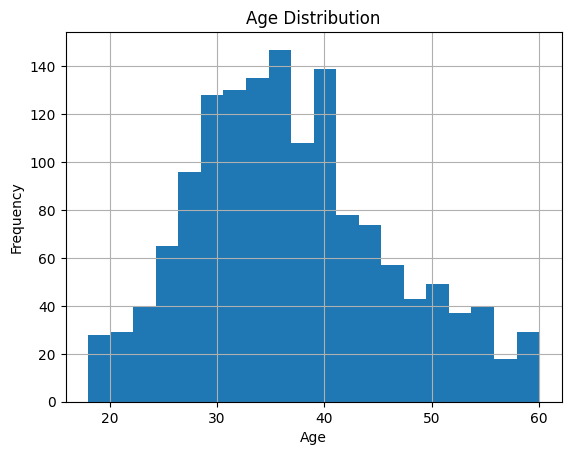

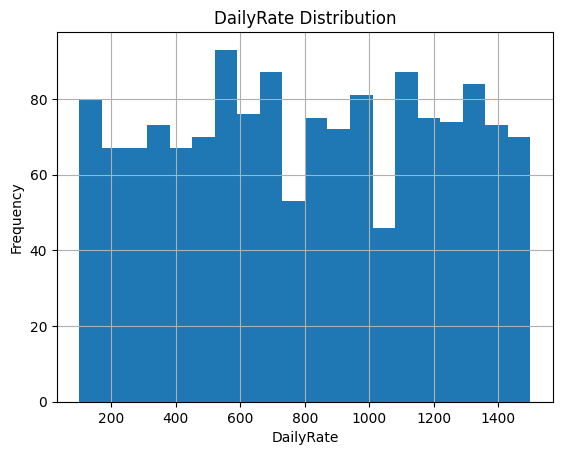

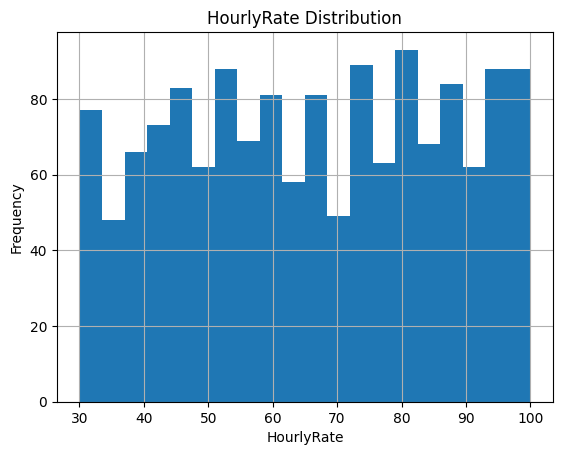

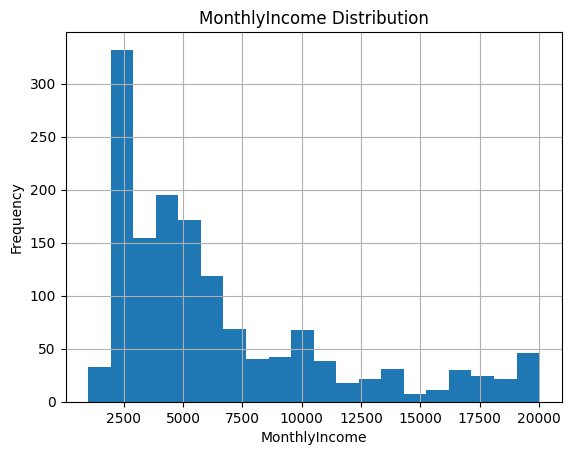

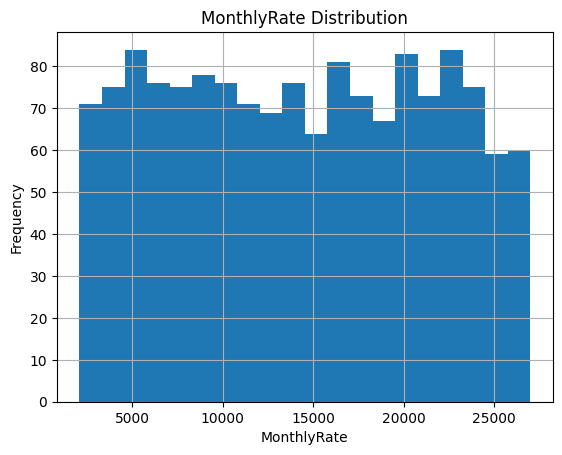

In [10]:
def plot_hist(features,df):
    for feature in features:    
        df[feature].hist(bins=20)
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

features_to_histplot = ['Age', 'DailyRate','HourlyRate', 'MonthlyIncome', 'MonthlyRate']
plot_hist(features_to_histplot,analysis_df)

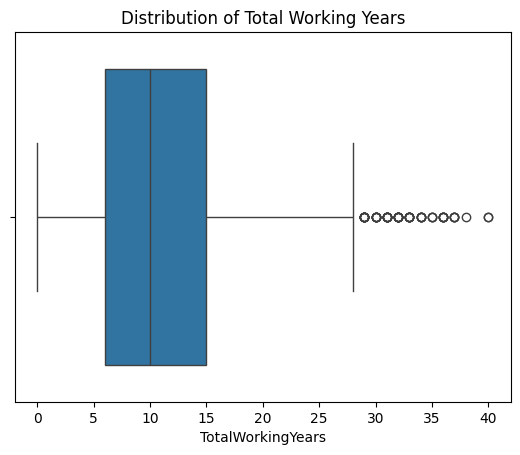

In [11]:
sns.boxplot(x=analysis_df['TotalWorkingYears'])
plt.title('Distribution of Total Working Years')
plt.show()


In [31]:
# Use another dataframe for analysis.

In [13]:
corelation = analysis_df[['Age','Attrition']].corr()

ValueError: could not convert string to float: 'Yes'

In [8]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

NameError: name 'corelation' is not defined

<Axes: xlabel='Age', ylabel='TotalWorkingYears'>

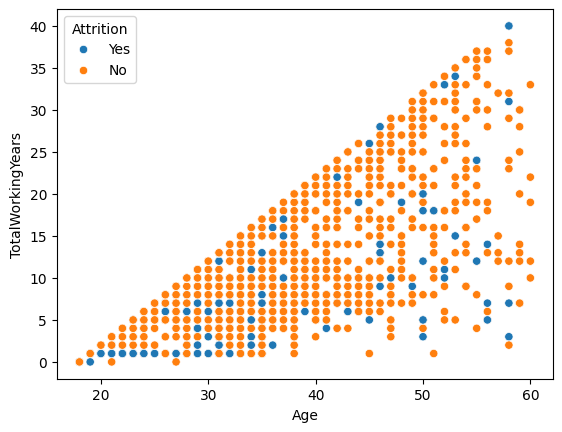

In [9]:
sns.scatterplot(data=df,x='Age',y='TotalWorkingYears',hue='Attrition')

In [10]:
columns = df.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [11]:
df["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

### People who are leaving:
* age group of 25 to 35
* daily rate 200 to 600 
* In R&D
* With Bachelor
* Job Level
* Job Role
* Montly Income  -- Satisfaction


In [ ]:
# for col in columns:
#     sns.displot(x=col,data=df,hue="Attrition")
#     plt.show()

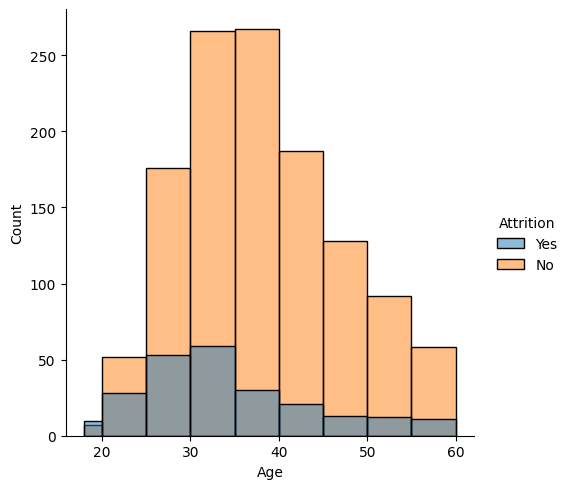

In [12]:
sns.displot(x="Age",data=df,hue="Attrition",bins=[18,20,25,30,35,40,45,50,55,60])

# People between age 30,35 are leving company

In [ ]:
df["Attrition"].value_counts()

## Model Building

### Data Preprocessing

In [15]:
df = DataSet

column_to_drop = ['EmployeeCount','Over18','StandardHours','EmployeeNumber']
df = df.drop(columns=column_to_drop,axis=1)

In [16]:
# Encoding binary categorical features using Label Encoding and one-hot encoding for multi-class categorical features.
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Attrition', 'Gender', 'OverTime']
encoder = LabelEncoder()
for col in binary_cols:
    df[col] = encoder.fit_transform(df[col])

df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)


In [17]:
# Scaling numerical features to standardize their values (mean = 0, std = 1) for better model performance.
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
            'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
            'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [18]:
# Splitting training and testing dataset.
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Checking class distribution in y_train before undersampling.
y_train.value_counts()

Attrition
0    986
1    190
Name: count, dtype: int64

In [20]:
# Applying undersampling to balance class distribution and storing the resampled data.
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

In [21]:
# Checking class distribution in y_train after undersampling.
y_resampled.value_counts()

Attrition
0    380
1    190
Name: count, dtype: int64

In [22]:
# Storing the resampling dataframe as csv.
df.to_csv("processed_data.csv", index=False)

In [23]:
# Importing various model to performance comparision.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Importing evaluation metrics to assess model performance.
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Storing models in a dictionary for comparison
models = {
    "Logistic Regression": LogisticRegression(random_state=42,solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGB Classifier" : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LGBM Classifier" : LGBMClassifier(class_weight="balanced", random_state=42),
    "Cat Boost Classifier" : CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', random_state=42, verbose=0),
    "KNN" : KNeighborsClassifier(n_neighbors=45)
}

# Initializing a result dictionary to track performance metrics for each model.
result_dict = {
    "model": [],
    "0_precision": [],
    "0_recall": [],
    "0_f1": [],
    "1_precision": [],
    "1_recall": [],
    "1_f1": [],
    "accuracy": []
}

In [25]:
# Loop to train, evaluate and store performance metric for each model.
for Model_Name, Model in models.items():
    print(f"Training {Model_Name}...")

    # Training the model.
    Model.fit(X_resampled, y_resampled)
    y_pred = Model.predict(X_test)

    # Get classification report as a dictionary.
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Append results into result_dict.
    result_dict["model"].append(Model_Name)
    result_dict["0_precision"].append(report_dict["0"]["precision"])
    result_dict["0_recall"].append(report_dict["0"]["recall"])
    result_dict["0_f1"].append(report_dict["0"]["f1-score"])
    result_dict["1_precision"].append(report_dict["1"]["precision"])
    result_dict["1_recall"].append(report_dict["1"]["recall"])
    result_dict["1_f1"].append(report_dict["1"]["f1-score"])
    result_dict["accuracy"].append(accuracy_score(y_test, y_pred))

    print(f"{Model_Name} evaluation completed.\n")

Training Logistic Regression...
Logistic Regression evaluation completed.

Training Decision Tree...
Decision Tree evaluation completed.

Training Random Forest...
Random Forest evaluation completed.

Training SVM...
SVM evaluation completed.

Training XGB Classifier...


/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:07:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB Classifier evaluation completed.

Training LGBM Classifier...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [26]:
# Converting result_dict to Dataframe.
Result_Dataframe = pd.DataFrame(result_dict)
Result_Dataframe.head(10)

,model,0_precision,0_recall,0_f1,1_precision,1_recall,1_f1,accuracy
0,Logistic Regression,0.919149,0.874494,0.896266,0.474576,0.595745,0.528302,0.829932
1,Decision Tree,0.877119,0.838057,0.857143,0.310345,0.382979,0.342857,0.765306
2,Random Forest,0.888000,0.898785,0.893360,0.431818,0.404255,0.417582,0.819728
3,SVM,0.897119,0.882591,0.889796,0.431373,0.468085,0.448980,0.816327
4,XGB Classifier,0.902655,0.825911,0.862579,0.367647,0.531915,0.434783,0.778912
5,LGBM Classifier,0.907895,0.838057,0.871579,0.393939,0.553191,0.460177,0.792517
6,Cat Boost Classifier,0.906780,0.866397,0.886128,0.431034,0.531915,0.476190,0.812925
7,KNN,0.865724,0.991903,0.924528,0.818182,0.191489,0.310345,0.863946


In [27]:
# Describing the Result_Dataframe.
Result_Dataframe.describe()

,0_precision,0_recall,0_f1,1_precision,1_recall,1_f1,accuracy
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.895555,0.877024,0.885172,0.457364,0.457447,0.427402,0.809949
std,0.017626,0.052740,0.021521,0.154084,0.130168,0.070814,0.030985
min,0.865724,0.825911,0.857143,0.310345,0.191489,0.310345,0.765306
25%,0.885280,0.838057,0.869329,0.387366,0.398936,0.398901,0.789116
50%,0.899887,0.870445,0.887962,0.431204,0.500000,0.441881,0.814626
75%,0.907058,0.886640,0.894087,0.442508,0.537234,0.464180,0.822279
max,0.919149,0.991903,0.924528,0.818182,0.595745,0.528302,0.863946


#### **Observations and Conclusions**

1. **Highest Accuracy**  
   - The **KNN** model achieved the highest accuracy of **0.8639**. This means that, overall, it correctly predicted the most labels among all models.

2. **Class 1 (Minority Class) Performance**  
   - When focusing on the **recall** of Class 1 (i.e., how many positive instances we are correctly identifying), **LGBM Classifier** has a high recall of **0.553**, but even more interesting is that **Logistic Regression** achieves the **highest F1-score (1_f1)** of **0.5283** for Class 1.  
   - This suggests that **Logistic Regression** strikes a good balance between precision and recall for the positive class compared to other models.

3. **Trade-Offs**  
   - Even though **KNN** has the highest accuracy, its recall for Class 1 is quite low (**0.1914**), indicating it might be missing many positive cases.

4. **Overall Balance**  
   - **Cat Boost**, **Random Forest**, and **SVM** all show respectable accuracy (above **0.81** for the most part) and moderate performance for the positive class. They might be good “middle ground” options if one wants decent accuracy and doesn’t want to lose too much recall for Class 1.

5. **Final Takeaway**  
   - **Choose KNN** if you only care about the maximum overall accuracy.  
   - **Choose Logistic Regression** if capturing Class 1 instances accurately is a priority (best F1 for Class 1).  
   - **Ensemble methods (LGBM, CatBoost, XGB)** also provide competitive performance, often balancing accuracy with better recall for the positive class.

6. **Conclusion**:
   - Each model has its own strengths:
      * **KNN** leads in overall accuracy.  
      * **Logistic Regression** is excellent for Class 1 F1-score.  
      * **LGBM** and **CatBoost** offer a good mix of accuracy and Class 1 recall.  


For our specific requirement of **high recall**, the **Logistic Regression** model seems more suitable than **KNN**. While **KNN** does have the highest accuracy, its recall for the positive class is quite low. On the other hand, Logistic Regression balances a good accuracy score with a much better recall, making it a more reliable choice for scenarios where correctly identifying positives is crucial.

### **Ensemble Model**

Now, to take it a step further and enhance performance, we will build and evaluate an ensemble model with a hard-voting scheme, comparing its results against the individual models.

In [30]:
# Importing required Libraries.
from itertools import combinations
from sklearn.ensemble import VotingClassifier

# Function to generate all possible model combinations from the models dictionary, create ensemble models using hard voting, train them, evaluate their performance, and store the evaluation metrics.
def evaluate_voting_combinations_to_df(models, X_train, y_train, X_test, y_test):
    result_dict = {
        "model": [],
        "0_precision": [],
        "0_recall": [],
        "0_f1": [],
        "1_precision": [],
        "1_recall": [],
        "1_f1": [],
        "accuracy": []
    }
    
    # Generates combinations of models (using at least 2 models)
    for r in range(2, len(models) + 1):
        for model_combination in combinations(models.items(), r):
            # Get model names and estimator tuples for VotingClassifier
            model_names = [name for name, _ in model_combination]
            model_str = ", ".join(model_names)
            estimators = list(model_combination)
            
            # Create VotingClassifier with hard voting
            voting_clf = VotingClassifier(estimators=estimators, voting='hard')
            voting_clf.fit(X_train, y_train)
            y_pred = voting_clf.predict(X_test)
            
            # Calculate accuracy and generate classification report
            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred, output_dict=True)
            
            # Extract metrics for classes "0" and "1"
            precision0 = report.get("0", {}).get("precision", 0)
            recall0    = report.get("0", {}).get("recall", 0)
            f10        = report.get("0", {}).get("f1-score", 0)
            
            precision1 = report.get("1", {}).get("precision", 0)
            recall1    = report.get("1", {}).get("recall", 0)
            f11        = report.get("1", {}).get("f1-score", 0)
            
            # Append metrics to the result dictionary
            result_dict["model"].append(model_str)
            result_dict["0_precision"].append(precision0)
            result_dict["0_recall"].append(recall0)
            result_dict["0_f1"].append(f10)
            result_dict["1_precision"].append(precision1)
            result_dict["1_recall"].append(recall1)
            result_dict["1_f1"].append(f11)
            result_dict["accuracy"].append(accuracy)
            
            print(f"Tested combination: {model_str}, Accuracy: {accuracy:.4f}")
    
    # Convert result_dict to a Pandas DataFrame
    df_results = pd.DataFrame(result_dict)
    
    # Sort the DataFrame by accuracy in descending order
    df_results.sort_values(by="accuracy", ascending=False, inplace=True)
    
    return df_results


In [ ]:
# Calling the function with all the arguments to get the dataframe of results.
df_results = evaluate_voting_combinations_to_df(models, X_resampled, y_resampled, X_test, y_test)

In [ ]:
# Storing the dataframe as a CSV.
df_results.to_csv("./ensemble_model_results.csv")

In [ ]:
# Output the first five row from the dataframes.
df_results.head()

In [ ]:
# Describe the Dataframe.
df_results.describe()

In [28]:
# Building an ensemble model using the best model combination from the dataframes. 
ensemble_model = {
    "LogisticRegression": models["Logistic Regression"],
    "LGBMClassifier" : models["LGBM Classifier"],
    "CatBoostClassifier" : models["Cat Boost Classifier"],
    "KNN" : models["KNN"]
}

In [31]:
# Creating the voting classifier
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in ensemble_model.items()],
    voting='hard'
)

# Train the ensemble model
voting_clf.fit(X_resampled, y_resampled)

# Predict
y_pred = voting_clf.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 190, number of negative: 380
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 950
[LightGBM] [Info] Number of data points in the train set: 570, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [32]:
# Evaluating the Model.
accuracy = accuracy_score(y_test, y_pred)

print(f"Ensemble Model Accuracy: {accuracy}")
print(classification_report(y_test,y_pred))

Ensemble Model Accuracy: 0.8877551020408163
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       247
           1       0.72      0.49      0.58        47

    accuracy                           0.89       294
   macro avg       0.81      0.73      0.76       294
weighted avg       0.88      0.89      0.88       294



#### **Ensemble Model Results vs. Individual Models**

- **Accuracy**: The new **ensemble model** (combining Logistic Regression, LGBM, CatBoost, and KNN) achieves an **accuracy of 0.8878**, outperforming the previously highest accuracy models (e.g., KNN at 0.8639).  
- **Class 0 Performance**: With a **precision of 0.91** and **recall of 0.96**, Class 0 predictions remain strong, contributing to the high overall accuracy.  
- **Class 1 Performance**: The ensemble model’s **recall for Class 1** (0.49) is better than KNN’s recall (0.19) but slightly lower than Logistic Regression’s recall observed in earlier trials.  
- **Trade-Off**: Although the ensemble boosts accuracy significantly compared to individual models, if the **primary objective is maximizing Class 1 recall**, one might still favor **Logistic Regression**. However, for a balance of high accuracy and reasonable recall, the ensemble is a promising approach.

## SHAP

/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/294 [00:00<?, ?it/s]/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/sarthak/.envs/MLenv/lib64/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have

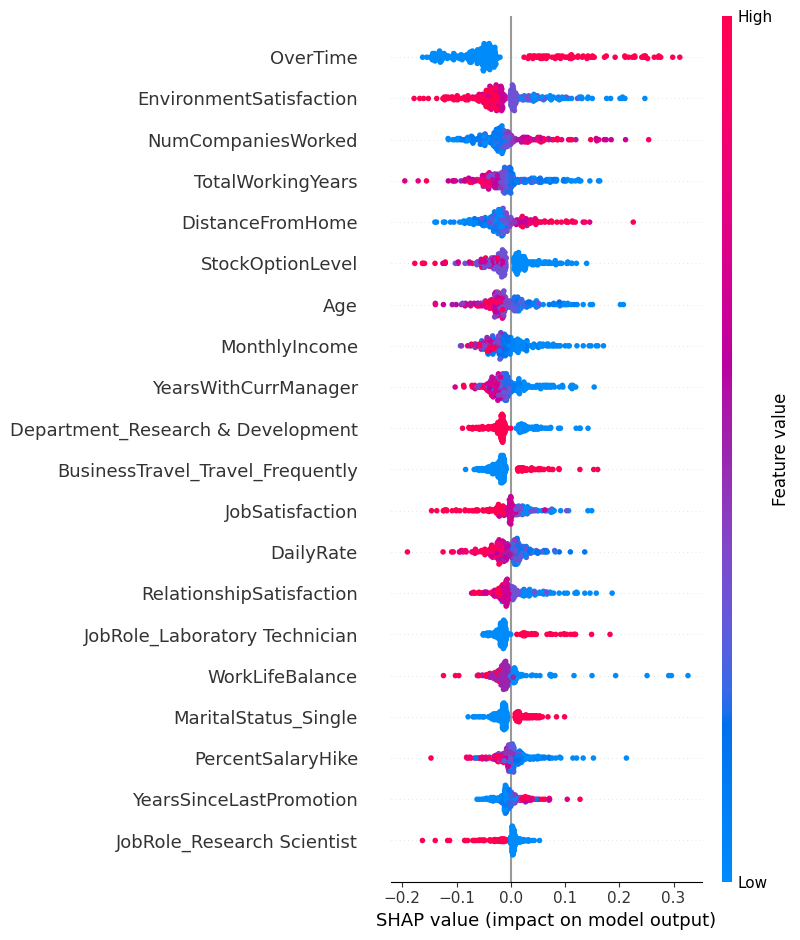

In [ ]:
import shap

# SHAP KernelExplainer requires a background sample (small subset of data)
background_sample = X_resampled.sample(100, random_state=42)

# Initialize SHAP explainer
explainer = shap.KernelExplainer(voting_clf.predict, background_sample)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test)


In [34]:
# Save the plot before showing it
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>